<a href="https://colab.research.google.com/github/Nawapon19/ML-Practice/blob/main/Credit_Card_Fraud_Detection_Practice.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Credit Card Fraud Detection**

The challenge is to recognize fraudulent credit card transactions so that the customers of credit card companies are not charged for items that they did not purchase.

**Main challenges involved in credit card fraud detection are:**

1. Enormous Data is processed every day and the model build must be fast enough to respond to the scam in time.
2. Imbalanced Data i.e most of the transactions (99.8%) are not fraudulent which makes it really hard for detecting the fraudulent ones
3. Data availability as the data is mostly private.
4. Misclassified Data can be another major issue, as not every fraudulent transaction is caught and reported.
5. Adaptive techniques used against the model by the scammers.

**How to tackle these challenges?**

1. The model used must be simple and fast enough to detect the anomaly and classify it as a fraudulent transaction as quickly as possible.
2. Imbalance can be dealt with by properly using some methods
3. For protecting the privacy of the user the dimensionality of the data can be reduced.
4. A more trustworthy source must be taken which double-check the data, at least for training the model.
5. We can make the model simple and interpretable so that when the scammer adapts to it with just some tweaks we can have a new model up and running to deploy.

**Importing all the necessary Libraries**

In [1]:
# import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib import gridspec
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import f1_score, matthews_corrcoef
from sklearn.metrics import confusion_matrix

**Loading the Data**

* The dataset contains transactions made by credit cards in September 2013 by European cardholders.

* This dataset presents transactions that occurred in two days, **492 frauds out of 284,807 transactions**.

* The dataset is **highly unbalanced**, the positive class (frauds) account for **0.172%** of all transactions.

* It contains only numerical input variables which are the result of a **PCA transformation.** (Features V1, V2, … V28)

* The original features and more background information about the data cannot be provided due to confidentiality issues.

In [2]:
# load the data into pandas dataframe
data = pd.read_csv('creditcard.csv')

data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [3]:
# print the shape of dataset
data.shape

(284807, 31)

In [4]:
# describe numerical values of the dataset
data.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [5]:
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
# determine the fraction of fraud cases in the dataset
fraud = data[data['Class'] == 1]
valid = data[data['Class'] == 0]

outlierFraction = len(fraud) / len(valid)

print(outlierFraction)
print("Fraud cases: {}".format(len(fraud)))
print("Valid transactions: {}".format(len(valid)))

0.0017304750013189597
Fraud cases: 492
Valid transactions: 284315


In [7]:
# describe Amount detail the fraudulent transactions
print("Amount details of fraudulent transaction")
fraud.Amount.describe()

Amount details of fraudulent transaction


count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [8]:
# describe Amount detail the valid transactions
print("Amount details of valid transaction")
valid.Amount.describe()

Amount details of valid transaction


count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

**Correlation Matrix:**
The correlation matrix graphically gives an idea of how features correlate with each other and can help to predict what are the features that are most relevant for the prediction

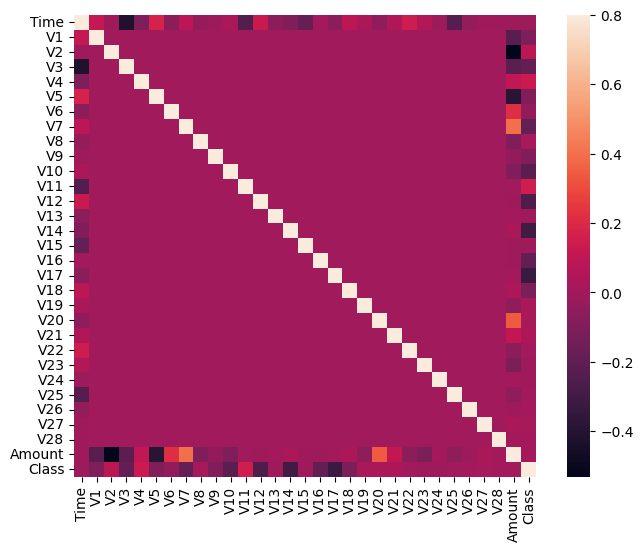

In [28]:
# plot the correlation matrix
corrmat = data.corr()
fig = plt.figure(figsize = (8, 6))
sns.heatmap(corrmat, vmax = .8, square = True)
plt.show()

* V2 and V5 are highly negatively correlated with the feature called Amount
* some correlation with V6, V7, V20 and Amount
* most of the features do not correlate to other features

In [11]:
# divide the data into input X and output Y
X = data.drop(['Class'], axis = 1)
Y = data['Class']

# print shape of X and Y
print(X.shape)
print(Y.shape)

# get the values for processing (numpy array)
xData = X.values
yData = Y.values

(284807, 30)
(284807,)


In [12]:
# split data for training and testing
xTrain, xTest, yTrain, yTest = train_test_split(xData, yData, test_size = 0.2, random_state = 42)

**Model Building and Prediction**

In [16]:
# build the Random Forest Classifier model using sklearn
rfc = RandomForestClassifier()

# train the model using training data
rfc.fit(xTrain, yTrain)

# make predictions using testing data
yPred = rfc.predict(xTest)

**Model Evaluation**

In [17]:
# evaluate the classifier and print out the results
n_outliers = len(fraud)
n_errors = (yPred != yTest).sum()

print("The model used is Random Forest Classifier")

acc = accuracy_score(yTest, yPred)
print("The accuracy is {}".format(acc))

prec = precision_score(yTest, yPred)
print("The precision is {}".format(prec))

rec = recall_score(yTest, yPred)
print("The recall is {}".format(rec))

f1 = f1_score(yTest, yPred)
print("The F-1 score is {}".format(f1))

mcc = matthews_corrcoef(yTest, yPred)
print("The Matthews correlation coefficient is {}".format(mcc))

The model used is Random Forest Classifier
The accuracy is 0.9995611109160493
The precision is 0.974025974025974
The recall is 0.7653061224489796
The F-1 score is 0.8571428571428571
The Matthews correlation coefficient is 0.8631826952924256


**Visualizing the Confusion Matrix**

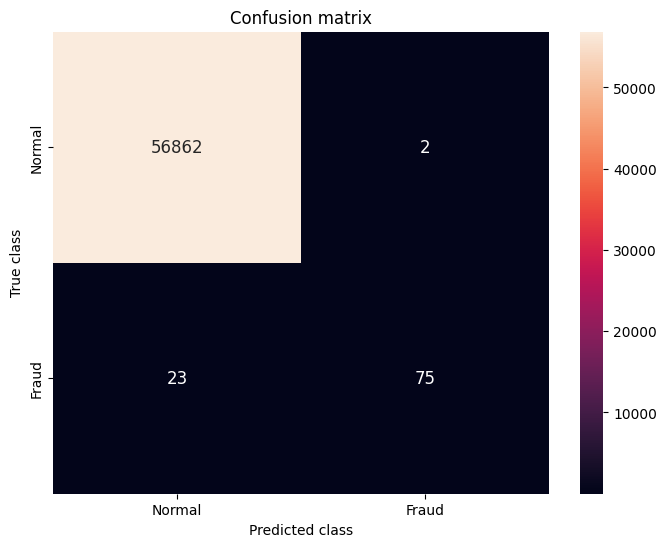

In [27]:
# print the confusion matrix
Labels = ['Normal', 'Fraud']
conf_matrix = confusion_matrix(yTest, yPred)

plt.figure(figsize = (8, 6))
sns.heatmap(conf_matrix,
            xticklabels = Labels,
            yticklabels = Labels,
            annot = True,
            annot_kws={"fontsize": 12},
            fmt = 'd')

plt.title("Confusion matrix")
plt.ylabel("True class")
plt.xlabel('Predicted class')
plt.show()